# Learning a function from a dataset

## Problem setup

We will learn a function from a dataset. The dataset used to train the model can be found here, and the dataset used to test the model can be found here.


## Dataset
First, let's have a look at the data sets:

In [1]:
import numpy as np

dataTrain = np.loadtxt("dataset.train")
x = dataTrain[:, 0]
y = dataTrain[:, 1]

In [2]:
dataTrain

array([[-7.32050808e+01, -1.44452995e-02],
       [ 1.01391727e+01, -6.91095889e-02],
       [-6.94608304e+01,  1.04614434e-01],
       [-5.11617733e+01, -1.39969866e-01],
       [ 5.46349369e+01,  1.56307858e-02],
       [ 2.43027642e+02,  9.53491289e-01],
       [ 1.25739980e+02,  9.76663772e-01],
       [ 1.38670733e+02,  1.03839340e+00],
       [ 1.16668619e+02,  9.96817105e-01],
       [ 2.56950891e+02,  9.95959215e-01],
       [ 2.46911465e+00,  5.95371526e-02],
       [ 2.71777279e+02,  1.03447419e+00],
       [-6.92036820e-01,  9.67163267e-02],
       [ 1.61689583e+02,  9.86029041e-01],
       [ 8.18992608e+01, -8.33533894e-03],
       [ 1.68112428e+02,  1.05928844e+00],
       [ 2.72706672e+02,  1.00279510e+00],
       [ 5.86555804e+01,  3.78365818e-02],
       [ 1.28179404e+01, -8.61008792e-02],
       [ 1.59990861e+02,  9.67718048e-01],
       [ 2.23806020e+02,  9.55052456e-01],
       [ 2.22147493e+02,  9.21007908e-01],
       [ 2.20961801e+02,  9.02289145e-01],
       [-5.

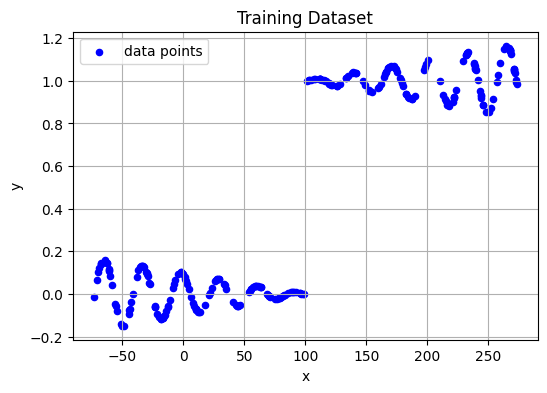

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=20, color="blue", label="data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
print("Number of training data entries:", len(dataTrain))

Number of training data entries: 258


In [5]:
import numpy as np

dataTest = np.loadtxt("dataset.test")
x2 = dataTest[:, 0]
y2 = dataTest[:, 1]

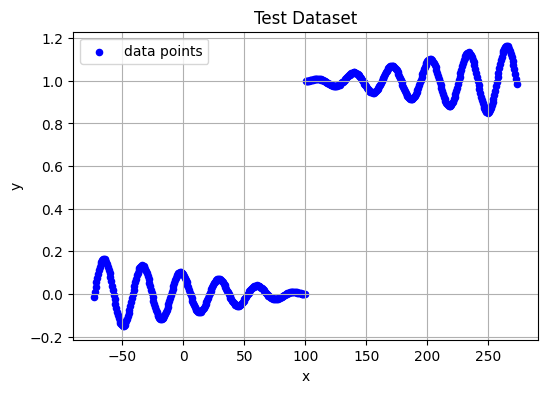

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(x2, y2, s=20, color="blue", label="data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
print("Number of test data entries:", len(dataTest))

Number of test data entries: 512


Let's find out, if there are any identical entries in the training and test dataset.

In [8]:
import numpy as np

def compare_datasets(dataTrain, dataTest):

    #Convert test data to dictionary
    test_dict = {float(x): float(y) for x, y in dataTest}

    #Initialize couts for all options of matches/mismatches of x- and y-values
    count_x_match = 0    # x-values in both datasets
    count_xy_match = 0    # identical data entries in both datasets
    count_xy_mismatch = 0    # x-values identical but respective y-values not
    count_x_missing = 0    # x-values from training dataset not in test dataset

    for x, y in dataTrain:
        x = float(x)
        y = float(y)
        
        #x-values in test dataset that also occcur in training dataset
        if x in test_dict:
            count_x_match += 1

            #Compare y-values
            if (y == test_dict[x]):
                count_xy_match += 1
            else:
                count_xy_mismatch += 1
        else:
            count_x_missing += 1

    return {
        "x_match": count_x_match,
        "xy_match": count_xy_match,
        "xy_mismatch": count_xy_mismatch,
        "x_missing": count_x_missing
    }

print(compare_datasets(dataTrain, dataTest))

{'x_match': 2, 'xy_match': 2, 'xy_mismatch': 0, 'x_missing': 256}


### Results:

The datasets consist of tuples of 2 numbers, which represent the x- and y-values of data points.

As the plots show, both datasets contain data points of a function.

The training dataset has 258 data entries, around half the number of the test dataset (512).

Most of the data entries are unique. Only 2 occur in both datasets. There are no mismatches (identical x-values in both datasets with different y-values), which would indicate different functions.

## Implementation

A step by step description of how to implement this code is written below.

Import the DeepXDE library used for this project as described below.

In [9]:
#The library has to be installed, if not ready done:
# !pip install deepxde

In [10]:
import deepxde as dde

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


The next step is to import the dataset needed for the model training.

In [11]:
fname_train = "dataset.train"
fname_test = "dataset.test"

The variables fname_train and fname_test are used to import the dataset and recall the dataset later in the code.

The next step is to define both fname_train and fname_test and standardize it in an appropriate form.

In [12]:
data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

After defining the dataset, the specifics of the model are defined. The first line defines the layout of the network size used to train the model. The next line specifies the activation function used tanh and the initializer as Glorot uniform.

In [13]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

The model can now be built using adam as an optimizer with a learning rate of 0.001. The model is trained with 50000 iterations:

In [14]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
'compile' took 1.803521 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.38e-01]    [3.52e-01]    [8.31e-01]    
1000      [6.76e-03]    [6.97e-03]    [1.17e-01]    
2000      [5.54e-03]    [5.97e-03]    [1.08e-01]    
3000      [5.09e-03]    [5.61e-03]    [1.05e-01]    
4000      [4.87e-03]    [5.40e-03]    [1.03e-01]    
5000      [4.80e-03]    [5.30e-03]    [1.02e-01]    
6000      [4.77e-03]    [5.26e-03]    [1.02e-01]    
7000      [4.76e-03]    [5.27e-03]    [1.02e-01]    
8000      [4.75e-03]    [5.28e-03]    [1.02e-01]    
9000      [4.74e-03]    [5.30e-03]    [1.02e-01]    
10000     [4.74e-03]    [5.32e-03]    [1.02e-01]    
11000     [4.73e-03]    [5.36e-03]    [1.03e-01]    
12000     [4.72e-03]    [5.39e-03]    [1.03e-01]    
13000     [4.71e-03]    [5.32e-03]    [1.02e-01]    
14000     [4.69e-03]    [5.15e-03]    [1.01e-01]    
15000     [4.67e-03]    [5.13e-03]    [1.00e-01]    
16000     [4.65e-03]    [5.13e-03]

The best trained model is saved and plotted.

Saving loss history to C:\Users\ICH\Desktop\Kurse\Scientific Machine Learning\Week08\loss.dat ...
Saving training data to C:\Users\ICH\Desktop\Kurse\Scientific Machine Learning\Week08\train.dat ...
Saving test data to C:\Users\ICH\Desktop\Kurse\Scientific Machine Learning\Week08\test.dat ...


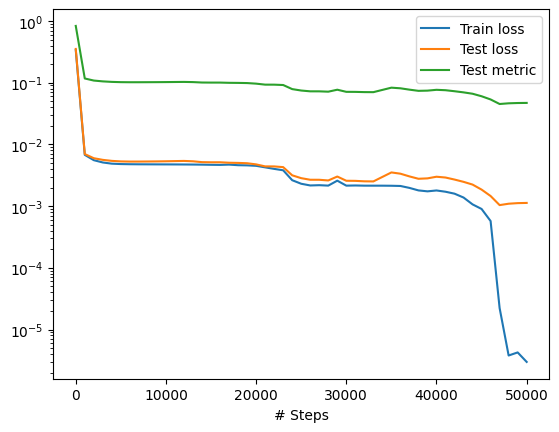

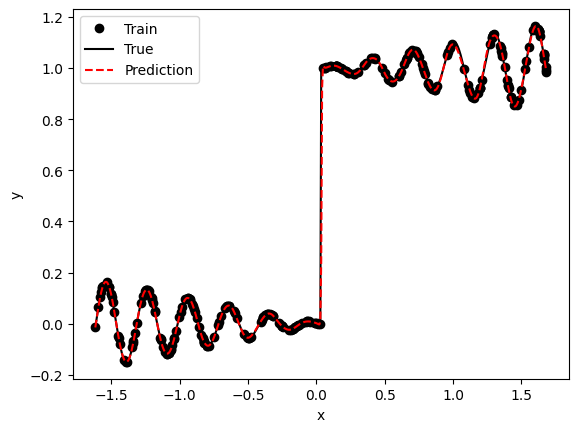

In [15]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

## Smaller Train Data Set

Idea: A smaller dataset could reduce the training time, but it might affect the accuracy of the predictions.

To get a dataset of half the previous size, we create a new one by keeping every second entry. Since the data entries seem to be in a random order within the dataset, and not ordered by x- or y-values, the result should also have some randomness.

In [16]:
#Keep every second entry of dataTrain to create smaller dataset dataSmall
dataSmall = dataTrain[::2]
np.savetxt("datasetSmall.train", dataSmall)

In [17]:
fname_train = "datasetSmall.train"
fname_test = "dataset.test"

In [18]:
data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

In [19]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

In [20]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
'compile' took 0.000613 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [5.77e-01]    [6.36e-01]    [1.12e+00]    
1000      [8.35e-03]    [9.38e-03]    [1.36e-01]    
2000      [5.32e-03]    [7.42e-03]    [1.21e-01]    
3000      [4.96e-03]    [7.38e-03]    [1.20e-01]    
4000      [4.37e-03]    [7.28e-03]    [1.19e-01]    
5000      [4.29e-03]    [7.06e-03]    [1.18e-01]    
6000      [4.25e-03]    [6.83e-03]    [1.16e-01]    
7000      [4.11e-03]    [6.73e-03]    [1.15e-01]    
8000      [4.06e-03]    [6.77e-03]    [1.15e-01]    
9000      [4.08e-03]    [6.59e-03]    [1.14e-01]    
10000     [4.05e-03]    [6.61e-03]    [1.14e-01]    
11000     [4.05e-03]    [6.53e-03]    [1.13e-01]    
12000     [4.10e-03]    [6.26e-03]    [1.11e-01]    
13000     [4.04e-03]    [6.44e-03]    [1.12e-01]    
14000     [4.04e-03]    [6.39e-03]    [1.12e-01]    
15000     [4.03e-03]    [6.41e-03]    [1.12e-01]    
16000     [4.04e-03]    [6.71e-03]

Saving loss history to C:\Users\ICH\Desktop\Kurse\Scientific Machine Learning\Week08\loss.dat ...
Saving training data to C:\Users\ICH\Desktop\Kurse\Scientific Machine Learning\Week08\train.dat ...
Saving test data to C:\Users\ICH\Desktop\Kurse\Scientific Machine Learning\Week08\test.dat ...


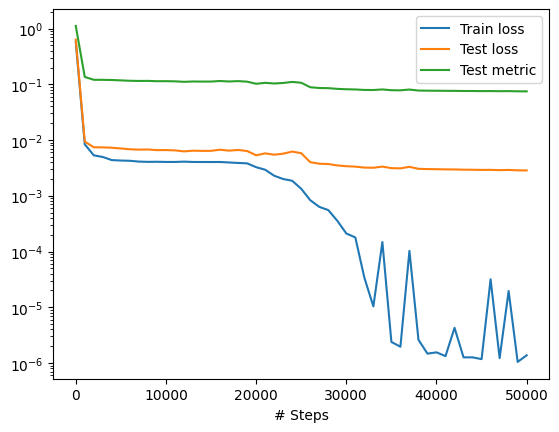

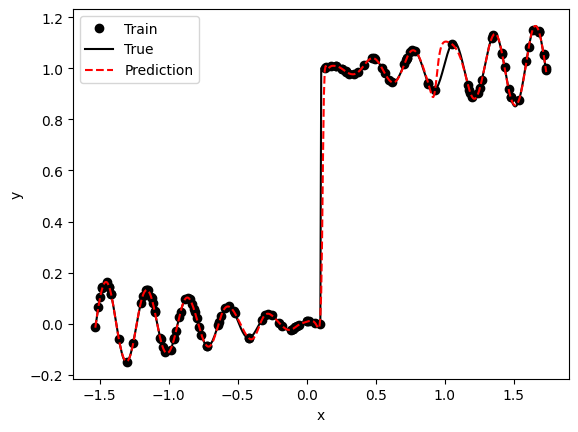

In [21]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

### Results
The training took almost exactly the same time in both runs, the run with the smaller dataset running 0.59 seconds longer. (Note: Across several runs of the code, the training time for the small dataset and the original configuration were usually quite similar to each other, the run for the small dataset usually being slightly faster.)

The training loss became better in the run with the smaller datset (around 34% of the previous training loss), the test loss around 153% higher and the test metric around 59% higher. 

Those are indications that less generalization and more overfitting took place.

In general, the results are still quite good. The prediction is notably inaccurate at one local maximum, as shown in the plot.

## Different Parameters

Parameters like the number and size of layers in the Neural Network, activation funktion, initializer, optimizer, learning rate, metrics and number of iterations can be adjusted. 
Here is one example:

In [22]:
fname_train = "dataset.train"
fname_test = "dataset.test"

In [23]:
data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

In [24]:
#add one hidden layer of the same size (=> 4 in total)
layer_size = [1] + [50] * 4 + [1]
#relu as activation function
activation = "relu"
#He normal as initializer
initializer = "He normal"
net = dde.nn.FNN(layer_size, activation, initializer)

In [25]:
model = dde.Model(data, net)

#Here, the optimizer, learning rate and metrics can be changed.
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
#The number of iterations can be adjusted here.
losshistory, train_state = model.train(iterations=50000)

Compiling model...
'compile' took 0.000290 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [9.45e-01]    [9.35e-01]    [1.35e+00]    
1000      [4.80e-03]    [5.25e-03]    [1.01e-01]    
2000      [4.71e-03]    [5.19e-03]    [1.01e-01]    
3000      [4.68e-03]    [5.31e-03]    [1.02e-01]    
4000      [4.48e-03]    [4.96e-03]    [9.87e-02]    
5000      [4.40e-03]    [4.85e-03]    [9.76e-02]    
6000      [4.88e-03]    [5.63e-03]    [1.05e-01]    
7000      [3.71e-03]    [4.31e-03]    [9.20e-02]    
8000      [3.73e-03]    [4.51e-03]    [9.41e-02]    
9000      [3.42e-03]    [4.31e-03]    [9.20e-02]    
10000     [3.01e-03]    [3.77e-03]    [8.59e-02]    
11000     [2.06e-03]    [2.68e-03]    [7.25e-02]    
12000     [1.57e-03]    [2.40e-03]    [6.87e-02]    
13000     [6.82e-04]    [1.63e-03]    [5.65e-02]    
14000     [7.54e-04]    [1.90e-03]    [6.10e-02]    
15000     [5.31e-04]    [1.45e-03]    [5.34e-02]    
16000     [1.90e-04]    [9.94e-04]

Saving loss history to C:\Users\ICH\Desktop\Kurse\Scientific Machine Learning\Week08\loss.dat ...
Saving training data to C:\Users\ICH\Desktop\Kurse\Scientific Machine Learning\Week08\train.dat ...
Saving test data to C:\Users\ICH\Desktop\Kurse\Scientific Machine Learning\Week08\test.dat ...


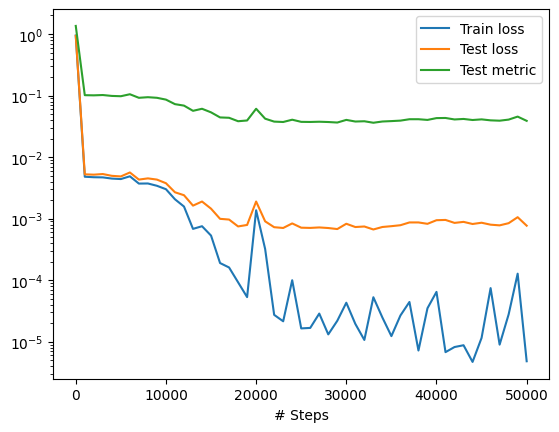

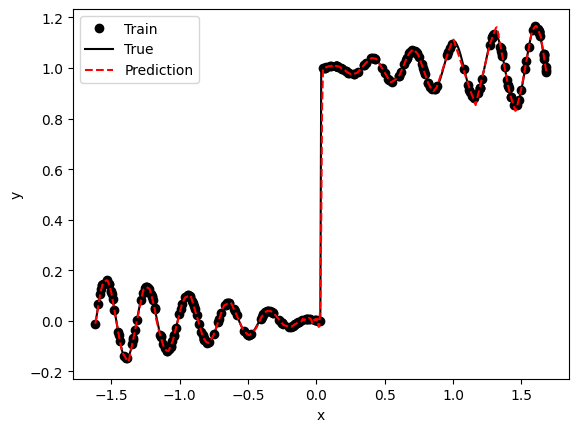

In [26]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

### Results

The results are an improvement over the first configuration. The test loss decreased by approximately 28% and the test metric by approximately 15%, while the training loss increased by approximately 58%. 
This shows better generalization of the model. 

The plot shows some inaccuracies in local minima and maxima of the function.

It must be noted, that the results varied across different runs of this code. In most cases, the test loss and metric were similar to or worse than the original configuration.

The runtime increased significantly, but this might be due to other applications utilizing system resources during training.